Noisy circuit analysis

Import libraries and modules

In [4]:
import sys
sys.path.append('../src')

import numpy as np
import ipympl

from noisy_circuits import generate_hamming_circuits
from noisy_circuits import generate_hellinger_circuits

from utils import simulate_with_noise_3D
from utils import DistanceVisualizer
from utils import plot_3d

hamming_circuits, hamming_true_outputs = generate_hamming_circuits()
hellinger_circuits, hellinger_ideal_dists = generate_hellinger_circuits()

print("All imports successful!")

All imports successful!


Workflow:
1. Simulate circuit with Hamming output 10 times over ranges of shots and noise
2. Save to file
3. Load from file
4. Visualize Hamming distance of run of choice with respect to number of shots. STD of all hamming distances
   is displayed on top and noise can be regulated.

Experiment 2:
QFT followed by inverse QFT on |101>

In [5]:
circuit_index = 1

mirrored_qft_circuit, true_output = hamming_circuits[circuit_index], hamming_true_outputs[circuit_index]
qft_circuit, ideal_dist = hellinger_circuits[circuit_index], hellinger_ideal_dists[circuit_index]

noise_levels = np.linspace(0, 0.2, 21)

# Create ranges for each segment
ranges = [
    np.arange(10, 250, 10),      # Usually big std reduction occurs here so we want to most precision
    np.arange(250, 1000, 50),   # Here it slowly starts to converge
    np.arange(1000, 2000, 100), # Usually completely converges in this range
    np.arange(2000, 10001, 500)
]
shot_counts = np.concatenate(ranges)

# Uncomment this when you want to generate data for a specific circuit

# # Simulate and collect Hellinger distance on 1 run
# hellinger_data = simulate_with_noise_3D(
#         qft_circuit, ideal_dist, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hellinger'
# )

# # Simulate and collect Hamming distance data 10 runs for averaging
# hamming_data = []
# for i in range(10):
#     print(f"Simulation run {i+1}/10 for circuit index {circuit_index}")
#     H = simulate_with_noise_3D(
#         mirrored_qft_circuit, true_output, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hamming'
#     )
#     hamming_data.append(H)

# # Save the data
# np.savez_compressed(
#     f'../data/circuit_{circuit_index}_data.npz',
#     shots_array=shot_counts,
#     noise_intensities=noise_levels,
#     hamming_data=hamming_data,
#     hellinger_data=hellinger_data
# )

In [6]:
# Load the data
loaded = np.load(f'../data/circuit_{circuit_index}_data.npz', allow_pickle=True)
shot_counts = loaded['shots_array']
noise_levels = loaded['noise_intensities']
hamming_data = loaded['hamming_data']
hellinger_data = loaded['hellinger_data']

visualizer = DistanceVisualizer(shot_counts, noise_levels, hamming_data, hellinger_data, mirrored_qft_circuit.num_qubits)
visualizer.create_dashboard()

interactive(children=(FloatSlider(value=0.1, description='Noise Intensity:', max=0.2, step=0.00952380952380952…

Experiment 3 a variational circuit

In [7]:
# PREPARE AND LOAD THE CIRCUIT
circuit_index = 2

var0, ideal_dist = hellinger_circuits[circuit_index], hellinger_ideal_dists[circuit_index]
var0_mirrored, true_output = hamming_circuits[circuit_index], hamming_true_outputs[circuit_index]

noise_levels = np.linspace(0, 0.2, 21)

# Create ranges for each segment
ranges = [
    np.arange(10, 250, 10),      # Usually big std reduction occurs here so we want to most precision
    np.arange(250, 1000, 50),   # Here it slowly starts to converge
    np.arange(1000, 2000, 100), # Usually completely converges in this range
    np.arange(2000, 10001, 500)
]
shot_counts = np.concatenate(ranges)

In [8]:
# # SIMULATE AND SAVE RESULTS - uncomment to generate data
# hellinger_data = simulate_with_noise_3D(
#          var0, ideal_dist, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hellinger'
# )

# hamming_data = []
# for i in range(10):
#     print(f"Simulation run {i+1}/10 for circuit index {circuit_index}")
#     H = simulate_with_noise_3D(
#         var0_mirrored, true_output, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hamming'
#     )
#     hamming_data.append(H)

# np.savez_compressed(
#     f'../data/circuit_{circuit_index}_data.npz',
#     shots_array=shot_counts,
#     noise_intensities=noise_levels,
#     hamming_data=hamming_data,
#     hellinger_data=hellinger_data
# )

In [9]:
# VISUALIZE EXPERIMENT
# Load the data
loaded = np.load(f'../data/circuit_{circuit_index}_data.npz', allow_pickle=True)
shot_counts = loaded['shots_array']
noise_levels = loaded['noise_intensities']
hamming_data = loaded['hamming_data']
hellinger_data = loaded['hellinger_data']

visualizer = DistanceVisualizer(shot_counts, noise_levels, hamming_data, hellinger_data, var0.num_qubits)
visualizer.create_dashboard()

interactive(children=(FloatSlider(value=0.1, description='Noise Intensity:', max=0.2, step=0.00952380952380952…

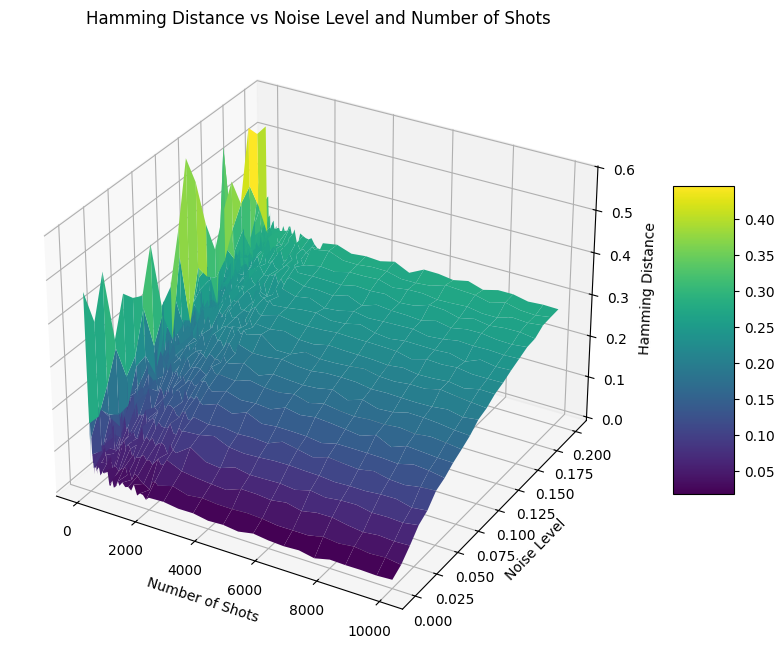

In [10]:
plot_3d(hellinger_data, noise_levels, shot_counts)

Expriment 4 - 4 qubits linear entanglement

In [11]:
# PREPARE AND LOAD THE CIRCUIT
circuit_index = 3

var1, ideal_dist = hellinger_circuits[circuit_index], hellinger_ideal_dists[circuit_index]
var1_mirrored, true_output = hamming_circuits[circuit_index], hamming_true_outputs[circuit_index]

noise_levels = np.linspace(0, 0.2, 21)

# Create ranges for each segment
ranges = [
    np.arange(10, 250, 10),      # Usually big std reduction occurs here so we want to most precision
    np.arange(250, 1000, 50),   # Here it slowly starts to converge
    np.arange(1000, 2000, 100), # Usually completely converges in this range
    np.arange(2000, 10001, 500)
]
shot_counts = np.concatenate(ranges)

In [12]:
# # SIMULATE AND SAVE RESULTS - uncomment to generate data
# hellinger_data = simulate_with_noise_3D(
#          var1, ideal_dist, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hellinger'
# )

# hamming_data = []
# for i in range(10):
#     print(f"Simulation run {i+1}/10 for circuit index {circuit_index}")
#     H = simulate_with_noise_3D(
#         var1_mirrored, true_output, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hamming'
#     )
#     hamming_data.append(H)

# np.savez_compressed(
#     f'../data/circuit_{circuit_index}_data.npz',
#     shots_array=shot_counts,
#     noise_intensities=noise_levels,
#     hamming_data=hamming_data,
#     hellinger_data=hellinger_data
# )

In [13]:
# VISUALIZE EXPERIMENT
# Load the data
loaded = np.load(f'../data/circuit_{circuit_index}_data.npz', allow_pickle=True)
shot_counts = loaded['shots_array']
noise_levels = loaded['noise_intensities']
hamming_data = loaded['hamming_data']
hellinger_data = loaded['hellinger_data']

visualizer = DistanceVisualizer(shot_counts, noise_levels, hamming_data, hellinger_data, var1.num_qubits)
visualizer.create_dashboard()

interactive(children=(FloatSlider(value=0.1, description='Noise Intensity:', max=0.2, step=0.00952380952380952…

Experiment 5: Circular entanglement

In [14]:
# PREPARE AND LOAD THE CIRCUIT
circuit_index = 4

var2, ideal_dist = hellinger_circuits[circuit_index], hellinger_ideal_dists[circuit_index]
var2_mirrored, true_output = hamming_circuits[circuit_index], hamming_true_outputs[circuit_index]

noise_levels = np.linspace(0, 0.2, 21)

# Create ranges for each segment
ranges = [
    np.arange(10, 250, 10),      # Usually big std reduction occurs here so we want to most precision
    np.arange(250, 1000, 50),   # Here it slowly starts to converge
    np.arange(1000, 2000, 100), # Usually completely converges in this range
    np.arange(2000, 10001, 500)
]
shot_counts = np.concatenate(ranges)

In [15]:
# # SIMULATE AND SAVE RESULTS - uncomment to generate data
# hellinger_data = simulate_with_noise_3D(
#          var2, ideal_dist, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hellinger'
# )

# hamming_data = []
# for i in range(10):
#     print(f"Simulation run {i+1}/10 for circuit index {circuit_index}")
#     H = simulate_with_noise_3D(
#         var2_mirrored, true_output, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hamming'
#     )
#     hamming_data.append(H)

# np.savez_compressed(
#     f'../data/circuit_{circuit_index}_data.npz',
#     shots_array=shot_counts,
#     noise_intensities=noise_levels,
#     hamming_data=hamming_data,
#     hellinger_data=hellinger_data
# )

In [16]:
# VISUALIZE EXPERIMENT
# Load the data
loaded = np.load(f'../data/circuit_{circuit_index}_data.npz', allow_pickle=True)
shot_counts = loaded['shots_array']
noise_levels = loaded['noise_intensities']
hamming_data = loaded['hamming_data']
hellinger_data = loaded['hellinger_data']

visualizer = DistanceVisualizer(shot_counts, noise_levels, hamming_data, hellinger_data, var2.num_qubits)
visualizer.create_dashboard()

interactive(children=(FloatSlider(value=0.1, description='Noise Intensity:', max=0.2, step=0.00952380952380952…

Experiment 6: Full entanglement

In [17]:
# PREPARE AND LOAD THE CIRCUIT
circuit_index = 5

var3, ideal_dist = hellinger_circuits[circuit_index], hellinger_ideal_dists[circuit_index]
var3_mirrored, true_output = hamming_circuits[circuit_index], hamming_true_outputs[circuit_index]

noise_levels = np.linspace(0, 0.2, 21)

# Create ranges for each segment
ranges = [
    np.arange(10, 250, 10),      # Usually big std reduction occurs here so we want to most precision
    np.arange(250, 1000, 50),   # Here it slowly starts to converge
    np.arange(1000, 2000, 100), # Usually completely converges in this range
    np.arange(2000, 10001, 500)
]
shot_counts = np.concatenate(ranges)

In [18]:
# # SIMULATE AND SAVE RESULTS - uncomment to generate data
# hellinger_data = simulate_with_noise_3D(
#          var3, ideal_dist, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hellinger'
# )

# hamming_data = []
# for i in range(10):
#     print(f"Simulation run {i+1}/10 for circuit index {circuit_index}")
#     H = simulate_with_noise_3D(
#         var3_mirrored, true_output, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hamming'
#     )
#     hamming_data.append(H)

# np.savez_compressed(
#     f'../data/circuit_{circuit_index}_data.npz',
#     shots_array=shot_counts,
#     noise_intensities=noise_levels,
#     hamming_data=hamming_data,
#     hellinger_data=hellinger_data
# )

In [19]:
# VISUALIZE EXPERIMENT
# Load the data
loaded = np.load(f'../data/circuit_{circuit_index}_data.npz', allow_pickle=True)
shot_counts = loaded['shots_array']
noise_levels = loaded['noise_intensities']
hamming_data = loaded['hamming_data']
hellinger_data = loaded['hellinger_data']

visualizer = DistanceVisualizer(shot_counts, noise_levels, hamming_data, hellinger_data, var3.num_qubits)
visualizer.create_dashboard()

interactive(children=(FloatSlider(value=0.1, description='Noise Intensity:', max=0.2, step=0.00952380952380952…

Experiment 7: Full entanglement with 4 layers

In [20]:
# PREPARE AND LOAD THE CIRCUIT
circuit_index = 6

var4, ideal_dist = hellinger_circuits[circuit_index], hellinger_ideal_dists[circuit_index]
var4_mirrored, true_output = hamming_circuits[circuit_index], hamming_true_outputs[circuit_index]

noise_levels = np.linspace(0, 0.2, 21)

# Create ranges for each segment
ranges = [
    np.arange(10, 250, 10),      # Usually big std reduction occurs here so we want to most precision
    np.arange(250, 1000, 50),   # Here it slowly starts to converge
    np.arange(1000, 2000, 100), # Usually completely converges in this range
    np.arange(2000, 10001, 500)
]
shot_counts = np.concatenate(ranges)

In [21]:
# # SIMULATE AND SAVE RESULTS - uncomment to generate data
# hellinger_data = simulate_with_noise_3D(
#          var4, ideal_dist, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hellinger'
# )

# hamming_data = []
# for i in range(10):
#     print(f"Simulation run {i+1}/10 for circuit index {circuit_index}")
#     H = simulate_with_noise_3D(
#         var4_mirrored, true_output, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hamming'
#     )
#     hamming_data.append(H)

# np.savez_compressed(
#     f'../data/circuit_{circuit_index}_data.npz',
#     shots_array=shot_counts,
#     noise_intensities=noise_levels,
#     hamming_data=hamming_data,
#     hellinger_data=hellinger_data
# )

In [22]:
# VISUALIZE EXPERIMENT
# Load the data
loaded = np.load(f'../data/circuit_{circuit_index}_data.npz', allow_pickle=True)
shot_counts = loaded['shots_array']
noise_levels = loaded['noise_intensities']
hamming_data = loaded['hamming_data']
hellinger_data = loaded['hellinger_data']

visualizer = DistanceVisualizer(shot_counts, noise_levels, hamming_data, hellinger_data, var4.num_qubits)
visualizer.create_dashboard()

interactive(children=(FloatSlider(value=0.1, description='Noise Intensity:', max=0.2, step=0.00952380952380952…

Experiment 7: full entanglement with 12 layers

In [23]:
# PREPARE AND LOAD THE CIRCUIT
circuit_index = 7

var5, ideal_dist = hellinger_circuits[circuit_index], hellinger_ideal_dists[circuit_index]
var5_mirrored, true_output = hamming_circuits[circuit_index], hamming_true_outputs[circuit_index]

noise_levels = np.linspace(0, 0.1, 51)

# Create ranges for each segment
ranges = [
    np.arange(10, 250, 10),      # Usually big std reduction occurs here so we want to most precision
    np.arange(250, 1000, 50),   # Here it slowly starts to converge
    np.arange(1000, 2000, 100), # Usually completely converges in this range
    np.arange(2000, 10001, 500)
]
shot_counts = np.concatenate(ranges)

In [24]:
# # SIMULATE AND SAVE RESULTS - uncomment to generate data
# hellinger_data = simulate_with_noise_3D(
#          var5, ideal_dist, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hellinger'
# )

# hamming_data = []
# for i in range(10):
#     print(f"Simulation run {i+1}/10 for circuit index {circuit_index}")
#     H = simulate_with_noise_3D(
#         var5_mirrored, true_output, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hamming'
#     )
#     hamming_data.append(H)

# np.savez_compressed(
#     f'../data/circuit_{circuit_index}_data.npz',
#     shots_array=shot_counts,
#     noise_intensities=noise_levels,
#     hamming_data=hamming_data,
#     hellinger_data=hellinger_data
# )

In [25]:
# VISUALIZE EXPERIMENT
# Load the data
loaded = np.load(f'../data/circuit_{circuit_index}_data.npz', allow_pickle=True)
shot_counts = loaded['shots_array']
noise_levels = loaded['noise_intensities']
hamming_data = loaded['hamming_data']
hellinger_data = loaded['hellinger_data']

visualizer = DistanceVisualizer(shot_counts, noise_levels, hamming_data, hellinger_data, var5.num_qubits)
visualizer.create_dashboard()

interactive(children=(FloatSlider(value=0.05, description='Noise Intensity:', max=0.1, step=0.0047619047619047…

Experiment 8: circular entanglement with 12 layers

In [26]:
# PREPARE AND LOAD THE CIRCUIT
circuit_index = 8

var6, ideal_dist = hellinger_circuits[circuit_index], hellinger_ideal_dists[circuit_index]
var6_mirrored, true_output = hamming_circuits[circuit_index], hamming_true_outputs[circuit_index]

noise_levels = np.linspace(0, 0.1, 51)

# Create ranges for each segment
ranges = [
    np.arange(10, 250, 10),      # Usually big std reduction occurs here so we want to most precision
    np.arange(250, 1000, 50),   # Here it slowly starts to converge
    np.arange(1000, 2000, 100), # Usually completely converges in this range
    np.arange(2000, 10001, 500)
]
shot_counts = np.concatenate(ranges)

In [27]:
# # SIMULATE AND SAVE RESULTS - uncomment to generate data
# hellinger_data = simulate_with_noise_3D(
#          var6, ideal_dist, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hellinger'
# )

# hamming_data = []
# for i in range(10):
#     print(f"Simulation run {i+1}/10 for circuit index {circuit_index}")
#     H = simulate_with_noise_3D(
#         var6_mirrored, true_output, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hamming'
#     )
#     hamming_data.append(H)

# np.savez_compressed(
#     f'../data/circuit_{circuit_index}_data.npz',
#     shots_array=shot_counts,
#     noise_intensities=noise_levels,
#     hamming_data=hamming_data,
#     hellinger_data=hellinger_data
# )

In [28]:
# VISUALIZE EXPERIMENT
# Load the data
loaded = np.load(f'../data/circuit_{circuit_index}_data.npz', allow_pickle=True)
shot_counts = loaded['shots_array']
noise_levels = loaded['noise_intensities']
hamming_data = loaded['hamming_data']
hellinger_data = loaded['hellinger_data']

visualizer = DistanceVisualizer(shot_counts, noise_levels, hamming_data, hellinger_data, var6.num_qubits)
visualizer.create_dashboard()

interactive(children=(FloatSlider(value=0.05, description='Noise Intensity:', max=0.1, step=0.0019607843137254…

Experiment 9: SU2 Ansatz, 1 layer, circular entanglement

In [29]:
# PREPARE AND LOAD THE CIRCUIT
circuit_index = 9

var7, ideal_dist = hellinger_circuits[circuit_index], hellinger_ideal_dists[circuit_index]
var7_mirrored, true_output = hamming_circuits[circuit_index], hamming_true_outputs[circuit_index]

noise_levels = np.linspace(0, 0.2, 51)

# Create ranges for each segment
ranges = [
    np.arange(10, 250, 10),      # Usually big std reduction occurs here so we want to most precision
    np.arange(250, 1000, 50),   # Here it slowly starts to converge
    np.arange(1000, 2000, 100), # Usually completely converges in this range
    np.arange(2000, 10001, 500)
]
shot_counts = np.concatenate(ranges)

In [30]:
# # SIMULATE AND SAVE RESULTS - uncomment to generate data
# hellinger_data = simulate_with_noise_3D(
#          var7, ideal_dist, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hellinger'
# )

# hamming_data = []
# for i in range(10):
#     print(f"Simulation run {i+1}/10 for circuit index {circuit_index}")
#     H = simulate_with_noise_3D(
#         var7_mirrored, true_output, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hamming'
#     )
#     hamming_data.append(H)

# np.savez_compressed(
#     f'../data/circuit_{circuit_index}_data.npz',
#     shots_array=shot_counts,
#     noise_intensities=noise_levels,
#     hamming_data=hamming_data,
#     hellinger_data=hellinger_data
# )

In [31]:
# VISUALIZE EXPERIMENT
# Load the data
loaded = np.load(f'../data/circuit_{circuit_index}_data.npz', allow_pickle=True)
shot_counts = loaded['shots_array']
noise_levels = loaded['noise_intensities']
hamming_data = loaded['hamming_data']
hellinger_data = loaded['hellinger_data']

visualizer = DistanceVisualizer(shot_counts, noise_levels, hamming_data, hellinger_data, var7.num_qubits)
visualizer.create_dashboard()

interactive(children=(FloatSlider(value=0.1, description='Noise Intensity:', max=0.2, step=0.00392156862745098…

Experiment 10: SU2 Ansatz, 4 layer, circular entanglement

In [32]:
# PREPARE AND LOAD THE CIRCUIT
circuit_index = 10

var8, ideal_dist = hellinger_circuits[circuit_index], hellinger_ideal_dists[circuit_index]
var8_mirrored, true_output = hamming_circuits[circuit_index], hamming_true_outputs[circuit_index]

noise_levels = np.linspace(0, 0.2, 51)

# Create ranges for each segment
ranges = [
    np.arange(10, 250, 10),      # Usually big std reduction occurs here so we want to most precision
    np.arange(250, 1000, 50),   # Here it slowly starts to converge
    np.arange(1000, 2000, 100), # Usually completely converges in this range
    np.arange(2000, 10001, 500)
]
shot_counts = np.concatenate(ranges)

In [33]:
# # SIMULATE AND SAVE RESULTS - uncomment to generate data
# hellinger_data = simulate_with_noise_3D(
#          var8, ideal_dist, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hellinger'
# )

# hamming_data = []
# for i in range(10):
#     print(f"Simulation run {i+1}/10 for circuit index {circuit_index}")
#     H = simulate_with_noise_3D(
#         var8_mirrored, true_output, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hamming'
#     )
#     hamming_data.append(H)

# np.savez_compressed(
#     f'../data/circuit_{circuit_index}_data.npz',
#     shots_array=shot_counts,
#     noise_intensities=noise_levels,
#     hamming_data=hamming_data,
#     hellinger_data=hellinger_data
# )

In [34]:
# VISUALIZE EXPERIMENT
# Load the data
loaded = np.load(f'../data/circuit_{circuit_index}_data.npz', allow_pickle=True)
shot_counts = loaded['shots_array']
noise_levels = loaded['noise_intensities']
hamming_data = loaded['hamming_data']
hellinger_data = loaded['hellinger_data']

visualizer = DistanceVisualizer(shot_counts, noise_levels, hamming_data, hellinger_data, var8.num_qubits)
visualizer.create_dashboard()

interactive(children=(FloatSlider(value=0.1, description='Noise Intensity:', max=0.2, step=0.00392156862745098…

Experiment 11: QFT Over 10 qubits (more qubits equals deeper circuit)

In [35]:
# PREPARE AND LOAD THE CIRCUIT
circuit_index = 11

var9, ideal_dist = hellinger_circuits[circuit_index], hellinger_ideal_dists[circuit_index]
var9_mirrored, true_output = hamming_circuits[circuit_index], hamming_true_outputs[circuit_index]

noise_levels = np.linspace(0, 0.1, 51)

# Create ranges for each segment
ranges = [
    np.arange(10, 250, 10),      # Usually big std reduction occurs here so we want to most precision
    np.arange(250, 1000, 50),   # Here it slowly starts to converge
    np.arange(1000, 2000, 100), # Usually completely converges in this range
    np.arange(2000, 10001, 500)
]
shot_counts = np.concatenate(ranges)

In [36]:
# # SIMULATE AND SAVE RESULTS - uncomment to generate data
# hellinger_data = simulate_with_noise_3D(
#          var9, ideal_dist, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hellinger'
# )

# hamming_data = []
# for i in range(10):
#     print(f"Simulation run {i+1}/10 for circuit index {circuit_index}")
#     H = simulate_with_noise_3D(
#         var9_mirrored, true_output, noise_levels=noise_levels, shot_counts=shot_counts, distance_type='hamming'
#     )
#     hamming_data.append(H)

# np.savez_compressed(
#     f'../data/circuit_{circuit_index}_data.npz',
#     shots_array=shot_counts,
#     noise_intensities=noise_levels,
#     hamming_data=hamming_data,
#     hellinger_data=hellinger_data
# )

In [37]:
# VISUALIZE EXPERIMENT
# Load the data
loaded = np.load(f'../data/circuit_{circuit_index}_data.npz', allow_pickle=True)
shot_counts = loaded['shots_array']
noise_levels = loaded['noise_intensities']
hamming_data = loaded['hamming_data']
hellinger_data = loaded['hellinger_data']

visualizer = DistanceVisualizer(shot_counts, noise_levels, hamming_data, hellinger_data, var9.num_qubits)
visualizer.create_dashboard()

interactive(children=(FloatSlider(value=0.05, description='Noise Intensity:', max=0.1, step=0.0019607843137254…